### Proyecto 1: Análisis y Predicción de Ventas en una Tienda de Retail

Objetivo: Realizar un análisis exploratorio de datos (EDA) completo, preprocesamiento y benchmarking de técnicas de machine learning para predecir ventas en una tienda de retail. Además, generar un análisis de métricas y crear una presentación de una página (one-page) en PPT para explicar los resultados. Todo el trabajo debe ser subido como una versión de liberación (v1.0.0) en GitHub.



In [302]:
# Carga de bibliotecas
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
# biblioteca google.
from google.colab import drive
# conecta colab con drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [304]:
path ="/content/drive/MyDrive/CLASE MACHINE LEARNING/DATA_CORES/retail_sales_dataset.csv"
df = pd.read_csv(path)

#### Parte 1: Exploración y Visualización de Datos (EDA)

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [306]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [307]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [308]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
transaction_id,1000.0,500.50,288.82,1.0,250.75,500.5,750.25,1000.0
age,1000.0,41.39,13.68,18.0,29.00,42.0,53.00,64.0
quantity,1000.0,2.51,1.13,1.0,1.00,3.0,4.00,4.0
price_per_unit,1000.0,179.89,189.68,25.0,30.00,50.0,300.00,500.0
total_amount,1000.0,456.00,560.00,25.0,60.00,135.0,900.00,2000.0


* age tiene min de 18 y max 64, dentro del margen de edad
* quantity tiene  promedio de 2.51 y min 1.0 y max 4.0 dentro del rango
* price_per_unit tiene promedio 179.89 y minimo 25.0 y maximo 500.0, estan dentro de rango correctos.
* total_mount tiene promedio 456.0 y minimo 25.0 con maximo 2000.0 dentro de rangos aceptados.

* Como se distingue a simple vista no hay datos a tipicos o posibles outliers
En adelante se aplicaran visualizaciones, para descartar posibles datos que se escapen de la mayoria.

#### Se verifica posibles nulos y duplicados

In [309]:
df.isna().sum()

,0
transaction_id,0
date,0
customer_id,0
gender,0
age,0
product_category,0
quantity,0
price_per_unit,0
total_amount,0


In [310]:
df.duplicated().sum()

np.int64(0)

In [311]:
columnas_categoricas = df.select_dtypes(include='object').columns.to_list()
print(columnas_categoricas)

['date', 'customer_id', 'gender', 'product_category']


In [312]:
df["customer_id"].unique()

array(['CUST001', 'CUST002', 'CUST003', 'CUST004', 'CUST005', 'CUST006',
       'CUST007', 'CUST008', 'CUST009', 'CUST010', 'CUST011', 'CUST012',
       'CUST013', 'CUST014', 'CUST015', 'CUST016', 'CUST017', 'CUST018',
       'CUST019', 'CUST020', 'CUST021', 'CUST022', 'CUST023', 'CUST024',
       'CUST025', 'CUST026', 'CUST027', 'CUST028', 'CUST029', 'CUST030',
       'CUST031', 'CUST032', 'CUST033', 'CUST034', 'CUST035', 'CUST036',
       'CUST037', 'CUST038', 'CUST039', 'CUST040', 'CUST041', 'CUST042',
       'CUST043', 'CUST044', 'CUST045', 'CUST046', 'CUST047', 'CUST048',
       'CUST049', 'CUST050', 'CUST051', 'CUST052', 'CUST053', 'CUST054',
       'CUST055', 'CUST056', 'CUST057', 'CUST058', 'CUST059', 'CUST060',
       'CUST061', 'CUST062', 'CUST063', 'CUST064', 'CUST065', 'CUST066',
       'CUST067', 'CUST068', 'CUST069', 'CUST070', 'CUST071', 'CUST072',
       'CUST073', 'CUST074', 'CUST075', 'CUST076', 'CUST077', 'CUST078',
       'CUST079', 'CUST080', 'CUST081', 'CUST082', 

In [313]:
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [314]:
df["product_category"].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [315]:
df[["product_category"]].value_counts()

,count
product_category,
Clothing,351
Electronics,342
Beauty,307


In [316]:
# Se cambia el tipo de dato de date a datetime
df["date"] = pd.to_datetime(df["date"])

In [317]:
df.dtypes

,0
transaction_id,int64
date,datetime64[ns]
customer_id,object
gender,object
age,int64
product_category,object
quantity,int64
price_per_unit,int64
total_amount,int64


In [318]:

df["age"].value_counts()

,count
age,
64,31
43,31
51,30
57,30
54,28
34,28
22,27
62,27
42,26


In [319]:
df["quantity"].value_counts()

,count
quantity,
4,263
1,253
2,243
3,241


In [320]:
df["price_per_unit"].value_counts()

,count
price_per_unit,
50,211
25,210
500,199
300,197
30,183


In [321]:
df["total_amount"].value_counts()

,count
total_amount,
50,115
100,108
200,62
900,62
1200,54
25,51
30,51
500,51
1500,50


#### Visualización de Datos:

/tmp/ipython-input-322-1764680726.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2].legend(loc='lower left', fontsize='large', shadow=False, title='Media', framealpha=1)


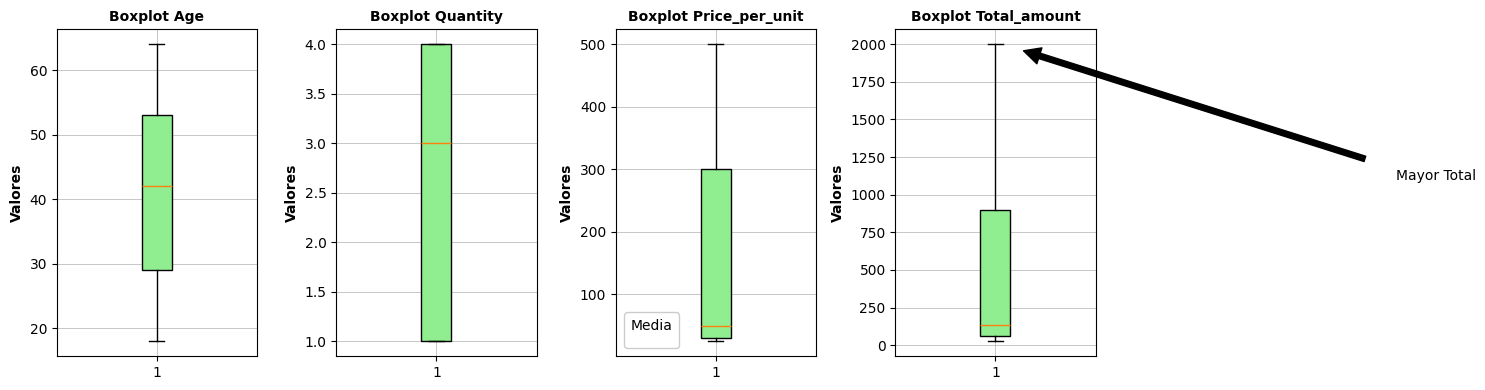

In [322]:
# Crear la figura y los subplots.
fig, axs = plt.subplots(1,4, figsize=(16, 4))
# Boxplot para las columnas numéricas
prop_caja = dict(facecolor='lightgreen')
numerical_cols = ['age', 'quantity', 'price_per_unit', 'total_amount']
for i, col in enumerate(numerical_cols):
    axs[i].boxplot(df[col], patch_artist=True, boxprops=prop_caja)
    axs[i].set_title(f"Boxplot {col.capitalize()}", fontsize=10, fontweight='bold')
    axs[i].set_ylabel("Valores", fontweight='bold')
    axs[i].grid(True, linewidth=0.5)
# Leyenda
axs[2].legend(loc='lower left', fontsize='large', shadow=False, title='Media', framealpha=1)

# Punto de anotación al tope a la derecha
x_max = 1
y_max = df['total_amount'].max()
axs[3].annotate('Mayor Total', xy=(x_max, y_max+15), xytext=(x_max+2 , y_max -900),
            arrowprops=dict(facecolor='black', shrink=0.07))


plt.tight_layout()
plt.show()

#### Se deduce de los gráficos boxplot que no hay valores outliers.
#### En el gráfico de age se deduce que el promedio de edad se encuentra en aproximado 40 años en un rango de 20 a mas de 60.
#### En el gráfico de quantity se deduce que el promedio esta aproximado en el valor 3 en un rango de 1 a 4.
#### En el gráfico de price_per_unit, el promedio se ecuentra en la zona baja, deduciendo que los precios por unidad son bajos y donde se distribuye las mayor cantidad de datos.
#### En el gráfico de total_amount el promedio al igual que el promedio del precio se encuentra en la zona baja con el promedio en el rango de 0 a 250.

#### Análisis de Correlación:

In [323]:
# Se aplica la correlacion de Pearson
df.drop(columns="transaction_id", inplace=True)
correlation_matrix = df[numerical_cols].corr(method='pearson')
print(correlation_matrix)

                     age  quantity  price_per_unit  total_amount
age             1.000000 -0.023737       -0.038423     -0.060568
quantity       -0.023737  1.000000        0.017501      0.373707
price_per_unit -0.038423  0.017501        1.000000      0.851925
total_amount   -0.060568  0.373707        0.851925      1.000000


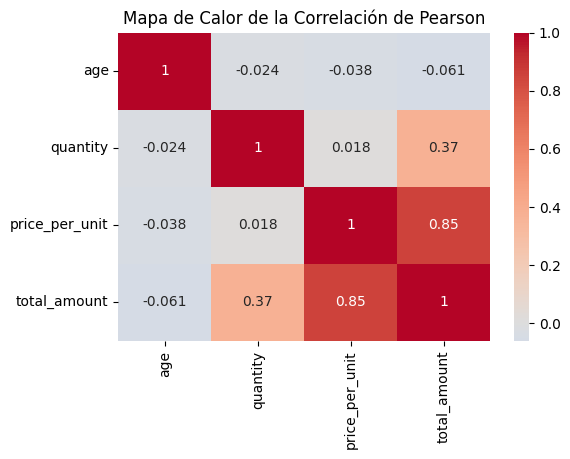

In [324]:
# Se Crea el mapas de calor
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

#### Correlaciones débiles.
* con age quantity -0.038 relación insignificante.
* age con price_per_unit -0.038 casi nula relación.
* age con total_amount correlación negativa muy debil
#### Correlaciones moderadas.
* quantity y total_Amount correlación de -0.37 negativa moderada. Esto sugiere posibles descuentos por volumen o productos de bajo precio con alta rotación.
### Correlaciones fuertes.
* price_per_unit y total_amount con una relacion de -0.85 negativa fuerte. Esto es cuando el precio unitaro aumenta, el monto total disminuye siginificativamente. puede suceder por estrategias de precios bajos para productos más caros. Los clientes compran menos unidades cuando los precios son mas altos.
#### Ausencia de relaciones significativas.
quantity y price_per_unit con -0..18, sin correlación relevante.
age no influye de manera apreciable en ninguna variable analizada.
#### Las variables mas influyentes son price_per_unit que impacta fuertemente en el monto total(total_amount).



#### Parte 2: Preprocesamiento de Datos

In [325]:
numerical_cols = ['quantity', 'price_per_unit']
categorical_cols = ["customer_id", "gender", "product_category"]

In [326]:
X = df.drop(columns=["total_amount", "customer_id", "gender", "product_category"])
y = df["total_amount"]

In [327]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelo de LinearRegression

In [328]:
# Preprocesador.
preprocessor_lr = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_cols)
])

# Modelo.
pipeline_lr = Pipeline([
    ("preprocessing_lr", preprocessor_lr),
    ("model_lr", LinearRegression())
])


In [329]:
# Entrenamiento.
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_lr',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['quantity',
                                                   'price_per_unit'])])),
                ('model_lr', LinearRegression())])

In [330]:
# Prediccion.
y_pred_lr = pipeline_lr.predict(X_test)

In [331]:
# Evaluar el modelo LinearRegression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'\nLinear Regression')
print(f'Error Cuadrático Medio: {mse_lr}')
print(f'R-cuadrado: {r2_lr}')



Linear Regression
Error Cuadrático Medio: 41860.813172886454
R-cuadrado: 0.8569981574765706


### Modelo de KNeighborsRegressor

In [332]:
X = df.drop(columns="total_amount")
y = df["total_amount"]

In [333]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [334]:
# Preprocesador knn.
preprocessor_knn = ColumnTransformer(transformers=[
    ("num_kn", StandardScaler(), numerical_cols),
    ("cat_kn", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Modelo.
pipeline_knn = Pipeline([
    ("preprocessing_knn", preprocessor_knn),
    ("model_knn", KNeighborsRegressor())
])

In [335]:
# Entrenamiento.
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_knn',
                 ColumnTransformer(transformers=[('num_kn', StandardScaler(),
                                                  ['quantity',
                                                   'price_per_unit']),
                                                 ('cat_kn',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customer_id', 'gender',
                                                   'product_category'])])),
                ('model_knn', KNeighborsRegressor())])

In [336]:
# Prediccion.
y_pred_knn = pipeline_knn.predict(X_test)

In [337]:
# Evaluación
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_score_knn = r2_score(y_test, y_pred_knn)
print(f'\nKNeighborsRegressor')
print(f'Error Cuadrático Medio: {mse_knn:.2f}')
print(f'R-cuadrado: {r2_score_knn:.2f}')


KNeighborsRegressor
Error Cuadrático Medio: 588.26
R-cuadrado: 1.00


#### Se aplica validación cruzada para encontrar el mejor k en modelo KNeighborsRegressor

In [338]:
# Se prueba diferentes valores de K
k_values = list(range(1, 21))
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(pipeline_knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k = k_values[mse_scores.index(max(mse_scores))]
print(f'Mejor valor de K: {best_k}')


Mejor valor de K: 1


#### Se aplico validación cruzada y se obtuvo un parametro de k=1, el cual se usa para volver a correr el modelo.

In [339]:
# Preprocesador knn.
preprocessor_knn1 = ColumnTransformer(transformers=[
    ("num_kn1", StandardScaler(), numerical_cols),
    ("cat_kn1", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Modelo.
pipeline_knn1 = Pipeline([
    ("preprocessing_knn1", preprocessor_knn1),
    ("model_knn1", KNeighborsRegressor(n_neighbors=1))
])

In [340]:
# Entrenamiento.
pipeline_knn1.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_knn1',
                 ColumnTransformer(transformers=[('num_kn1', StandardScaler(),
                                                  ['quantity',
                                                   'price_per_unit']),
                                                 ('cat_kn1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customer_id', 'gender',
                                                   'product_category'])])),
                ('model_knn1', KNeighborsRegressor(n_neighbors=1))])

In [341]:
# Prediccion.
y_pred_knn1 = pipeline_knn1.predict(X_test)

In [342]:
# Evaluación
mse_knn1 = mean_squared_error(y_test, y_pred_knn1)
r2_score_knn1 = r2_score(y_test, y_pred_knn1)
print(f'\nKNeighborsRegressor')
print(f'Error Cuadrático Medio: {mse_knn1:.2f}')
print(f'R-cuadrado: {r2_score_knn1:.2f}')


KNeighborsRegressor
Error Cuadrático Medio: 0.00
R-cuadrado: 1.00


#### Modelo RamdomForestRegressor

In [343]:
# Preprocesador RandomforestRegressor.
preprocessor_ft = ColumnTransformer(transformers=[
    ("num_ft", 'passthrough', numerical_cols),
    ("cat_ft", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Modelo Randm forest.
pipeline_ft = Pipeline([
    ("pp_ft", preprocessor_ft),
    ("modeloft", RandomForestRegressor())
])

In [344]:
# Entrenamiento.
pipeline_ft.fit(X_train, y_train)

Pipeline(steps=[('pp_ft',
                 ColumnTransformer(transformers=[('num_ft', 'passthrough',
                                                  ['quantity',
                                                   'price_per_unit']),
                                                 ('cat_ft',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customer_id', 'gender',
                                                   'product_category'])])),
                ('modeloft', RandomForestRegressor())])

In [345]:
# Prediccion.
y_pred_ft = pipeline_ft.predict(X_test)

In [346]:
# Evaluación
mse_ft = mean_squared_error(y_test, y_pred_ft)
r2_score_ft = r2_score(y_test, y_pred_ft)
print(f'\nRandomForestRegressor')
print(f'Error Cuadrático Medio: {mse_ft}')
print(f'R-cuadrado: {r2_score_ft}')


RandomForestRegressor
Error Cuadrático Medio: 0.0
R-cuadrado: 1.0


#### Se aplica GridSearch para optimizar parametros en RandomForestRegressor

In [347]:
# Optimizacion de hiperparametros.
ft_params = {
    "modeloft__n_estimators": [50, 100, 200]
}

ft_grid = GridSearchCV(pipeline_ft, ft_params, cv=3, scoring="r2", n_jobs=-1)
ft_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pp_ft',
                                        ColumnTransformer(transformers=[('num_ft',
                                                                         'passthrough',
                                                                         ['quantity',
                                                                          'price_per_unit']),
                                                                        ('cat_ft',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['customer_id',
                                                                          'gender',
                                                                          'product_category'])])),
                                       ('modeloft', RandomForestRegressor())]),
             n_jobs=-1, param_grid={'modeloft__n_estimators': [50, 100, 200]},
             scoring='r2')

In [348]:
# Evaluación.
ft_best = ft_grid.best_estimator_
y_pred_ft = ft_best.predict(X_test)

print("Forest Regressor")
print("Mejores parámetros:", ft_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_ft))

Forest Regressor
Mejores parámetros: {'modeloft__n_estimators': 50}
R²: 1.0


#### Se aplica el parametro encontrado con Gridsearch al modelo RandomForestRegressor

In [349]:
# Preprocesador RandomforestRegressor.
preprocessor_ft1 = ColumnTransformer(transformers=[
    ("num_ft1", 'passthrough', numerical_cols),
    ("cat_ft1", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Modelo Randm forest.
pipeline_ft1 = Pipeline([
    ("pp_ft1", preprocessor_ft1),
    ("modeloft1", RandomForestRegressor(n_estimators=50))
])

In [350]:
# Entrenamiento.
pipeline_ft1.fit(X_train, y_train)

Pipeline(steps=[('pp_ft1',
                 ColumnTransformer(transformers=[('num_ft1', 'passthrough',
                                                  ['quantity',
                                                   'price_per_unit']),
                                                 ('cat_ft1',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customer_id', 'gender',
                                                   'product_category'])])),
                ('modeloft1', RandomForestRegressor(n_estimators=50))])

In [351]:
# Prediccion.
y_pred_ft1 = pipeline_ft1.predict(X_test)

In [352]:
# Evaluación
mse_ft1 = mean_squared_error(y_test, y_pred_ft1)
r2_score_ft1 = r2_score(y_test, y_pred_ft1)
print(f'\nRandomForestRegressor')
print(f'Error Cuadrático Medio: {mse_ft1}')
print(f'R-cuadrado: {r2_score_ft1}')


RandomForestRegressor
Error Cuadrático Medio: 0.0
R-cuadrado: 1.0


#### Comparación de Modelos

In [353]:
print(f'\nLinear Regression')
print(f'Error Cuadrático Medio: {mse_lr}')
print(f'R-cuadrado: {r2_lr}')
print(f'\nKNeighborsRegressor')
print(f'Error Cuadrático Medio: {mse_knn:.2f}')
print(f'R-cuadrado: {r2_score_knn:.2f}')
print(f'\nKNeighborsRegressor, validacion Cruzada K=1')
print(f'Error Cuadrático Medio: {mse_knn1:.2f}')
print(f'R-cuadrado: {r2_score_knn1:.2f}')
print(f'\nRandomForestRegressor')
print(f'Error Cuadrático Medio: {mse_ft}')
print(f'R-cuadrado: {r2_score_ft}')
print(f"\nRandomForestRegressor, GridSearch:", ft_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_ft))
print(f'\nRandomForestRegressor: n_estimators=50 ')
print(f'Error Cuadrático Medio: {mse_ft1}')
print(f'R-cuadrado: {r2_score_ft1}')


Linear Regression
Error Cuadrático Medio: 41860.813172886454
R-cuadrado: 0.8569981574765706

KNeighborsRegressor
Error Cuadrático Medio: 588.26
R-cuadrado: 1.00

KNeighborsRegressor, validacion Cruzada K=1
Error Cuadrático Medio: 0.00
R-cuadrado: 1.00

RandomForestRegressor
Error Cuadrático Medio: 0.0
R-cuadrado: 1.0

RandomForestRegressor, GridSearch: {'modeloft__n_estimators': 50}
R²: 1.0

RandomForestRegressor: n_estimators=50 
Error Cuadrático Medio: 0.0
R-cuadrado: 1.0


A partir de las metricas observadas, se concluye que el modelo KNeighborsRegressor y RandomForestRegressor, obtuvieron los mejores resultados en cuanto al r-cuadrado y el error cuadratico medio. Se deduce que el resultado es producto de la data, en efecto sin muchas caracteristicas y con datos muy relacionados, como el precio por unidad y el monto total con una fuerte relación. al aplicar procesos de optimización de parametros, como validación cruzada y gridsearch, no tuvieron mucha ingerencia en el resultado.  